In [1]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, log_loss
from sklearn.metrics import confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE

In [33]:
import matplotlib.pyplot as plt

In [60]:
df = pd.read_csv('d:/MY_REPOSITORY/depression_suicide_project/Pretrained_embedding_models/dataset/suicide/CSSRS/combined_CSSR_twitter_dataset.csv')

In [4]:
df = pd.read_csv('c:/Users/Teacher/Downloads/train.csv')

In [5]:
df.columns

Index(['id', 'comment_text', 'toxic', 'severe_toxic', 'obscene', 'threat',
       'insult', 'identity_hate'],
      dtype='object')

In [6]:
df

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
159566,ffe987279560d7ff,""":::::And for the second time of asking, when ...",0,0,0,0,0,0
159567,ffea4adeee384e90,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0
159568,ffee36eab5c267c9,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0
159569,fff125370e4aaaf3,And it looks like it was actually you who put ...,0,0,0,0,0,0


In [7]:
class_Labels = df.columns[2:]

class_Labels

Index(['toxic', 'severe_toxic', 'obscene', 'threat', 'insult',
       'identity_hate'],
      dtype='object')

In [8]:
df['labels'] = df[class_Labels].idxmax(axis=1)

df['labels'].value_counts()

labels
toxic            158640
obscene             523
insult              329
identity_hate        54
threat               25
Name: count, dtype: int64

In [9]:
df[df['obscene']==1]

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,labels
6,0002bcb3da6cb337,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1,1,1,0,1,0,toxic
42,001810bf8c45bf5f,You are gay or antisemmitian? \n\nArchangel WH...,1,0,1,0,1,1,toxic
43,00190820581d90ce,"FUCK YOUR FILTHY MOTHER IN THE ASS, DRY!",1,0,1,0,1,0,toxic
51,001dc38a83d420cf,GET FUCKED UP. GET FUCKEEED UP. GOT A DRINK T...,1,0,1,0,0,0,toxic
55,0020e7119b96eeeb,Stupid peace of shit stop deleting my stuff as...,1,1,1,0,1,0,toxic
...,...,...,...,...,...,...,...,...,...
159411,fd2f53aafe8eefcc,Fat piece of shit \n\nyou obese piece of shit....,1,0,1,0,1,0,toxic
159493,fef142420a215b90,FUCKING FAGGOT \n\nLOLWAT.,1,0,1,0,1,0,toxic
159494,fef4cf7ba0012866,"""\n\n our previous conversation \n\nyou fuckin...",1,0,1,0,1,1,toxic
159541,ffa33d3122b599d6,Your absurd edits \n\nYour absurd edits on gre...,1,0,1,0,1,0,toxic


In [10]:
row_sum = df[['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']].sum(axis=1)
df.loc[row_sum == 0, 'labels'] = 'Non-toxic'

df=df.rename(columns={'comment_text': 'Post', 'labels':'class'})
df.columns

Index(['id', 'Post', 'toxic', 'severe_toxic', 'obscene', 'threat', 'insult',
       'identity_hate', 'class'],
      dtype='object')

In [11]:
# removing not interested categories
df = df[df['class']!='Non-toxic']
df['class'].value_counts()

class
toxic            15294
obscene            523
insult             329
identity_hate       54
threat              25
Name: count, dtype: int64

In [12]:
df['sum'] = df[['toxic', 'severe_toxic', 'obscene', 'threat', 'insult','identity_hate']].sum(axis=1)

only_toxic = df[(df['class'] == 'toxic') & (df['sum'] == 1)]

except_toxic = df[(df['class'] != 'toxic')]

In [13]:
new_df = pd.concat([only_toxic,except_toxic])

In [27]:
new_df['class'].value_counts()

class
toxic            5666
obscene           523
insult            329
identity_hate      54
threat             25
Name: count, dtype: int64

In [20]:
from ipynb.fs.full.preprocess_dataset_in_dataframe import preprocess_dataset

In [21]:
final_df = preprocess_dataset(new_df)

In [28]:
new_df.to_csv('cleaned_jigsaw.csv')

In [29]:
final_df = pd.read_csv('cleaned_jigsaw.csv', usecols=['Post', 'class'])

final_df

,Post,class
0,hey talk exclusive group taliban good destroy ...,toxic
1,bye look come think comme tosser,toxic
2,sorry sorry screw someone talk page bad know t...,toxic
3,believe fat artie recent appearence tonight ja...,toxic
4,sorry puck say dick number clearly list second...,toxic
...,...,...
6592,castro try liberate cuba domination uplift wor...,obscene
6593,hey fayssalfag life offline constructive life ...,obscene
6594,administratore need help stop direktor alasdai...,insult
6595,dear dear fukin sad regret rest life,obscene


In [30]:
final_df['class'].value_counts()

class
toxic            5666
obscene           523
insult            329
identity_hate      54
threat             25
Name: count, dtype: int64

In [31]:
df['length'] =df['Post']['class'=='toxic'].astype(str).map(len)

In [37]:
df['class'=='toxic']

KeyError: False

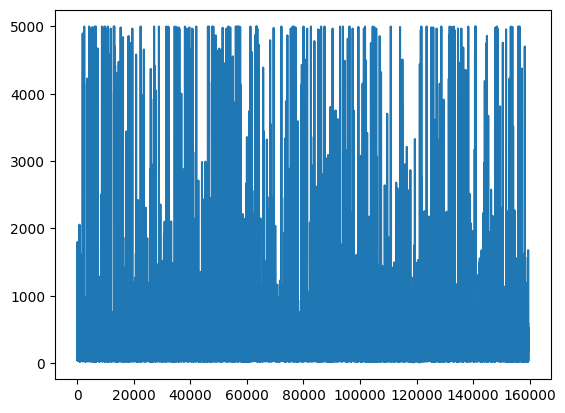

In [34]:
plt.plot(df.length)

In [26]:
for row, col in final_df.iterrows():
    print(col['Post'])
    break

hey talk exclusive group taliban good destroy self appoint purist gang ask question abt anti social destructive ask sityush clean behavior issue nonsensical warn


In [19]:
# This part is need for the Label encoding
from sklearn.preprocessing import LabelEncoder

LE = LabelEncoder()
final_df['class'] = LE.fit_transform(final_df['class'])
final_df = final_df.sample(frac=1).reset_index(drop=True)

LE.classes_

array(['identity_hate', 'insult', 'obscene', 'threat', 'toxic'],
      dtype=object)

In [16]:
final_df['class'].value_counts()

class
4    5666
2     523
1     329
0      54
3      25
Name: count, dtype: int64

In [38]:
final_df['length'] = final_df['Post'].lamda(x: len(x))

SyntaxError: invalid syntax (1117568772.py, line 1)

In [26]:
# Split data into features (X) and labels (y)
X = final_df['Post']
y = final_df['class']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [27]:
# Define TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Define classifiers with specified parameters
classifiers = {
    'K Nearest Neighbors': KNeighborsClassifier(n_neighbors=5),
    'SVM': SVC(degree=2, gamma=0.7, kernel='rbf'),
    'Decision Tree': DecisionTreeClassifier(criterion='gini', splitter='best', min_samples_split=2),
    'Random Forest': RandomForestClassifier(n_estimators=100, criterion='gini', min_samples_split=2, min_samples_leaf=1, max_features='sqrt'),
    'Neural Net (Multi-layer perceptron)': MLPClassifier(solver='adam', alpha=1, hidden_layer_sizes=(15,)),
    'AdaBoost': AdaBoostClassifier(n_estimators=50, learning_rate=1.0, algorithm='SAMME.R'),
#     'Gaussian Process': GaussianProcessClassifier(),
#     'Naive Bayes (GaussianNB)': GaussianNB(var_smoothing=1e-9)
}


In [28]:
from sklearn.base import TransformerMixin
class DenseTransformer(TransformerMixin):

    def fit(self, X, y=None, **fit_params):
        return self

    def transform(self, X, y=None, **fit_params):
        return X.todense()

In [32]:
# Create pipeline for each classifier
pipelines = {}
for name, clf in classifiers.items():
    pipelines[name] = Pipeline([
        ('tfidf', tfidf_vectorizer),
#         ('smote', SMOTE(random_state=42)),  # SMOTE for oversampling
        ('classifier', clf)
    ])

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

Training and evaluating K Nearest Neighbors...
K Nearest Neighbors - Accuracy: 0.8576, F1 Score: 0.7918, Precision: 0.7354, Recall: 0.8576
K Nearest Neighbors - Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         9
           1       0.00      0.00      0.00        74
           2       0.00      0.00      0.00       102
           3       0.00      0.00      0.00         3
           4       0.86      1.00      0.92      1132

    accuracy                           0.86      1320
   macro avg       0.17      0.20      0.18      1320
weighted avg       0.74      0.86      0.79      1320




C:\Users\Teacher\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Teacher\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Teacher\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifi

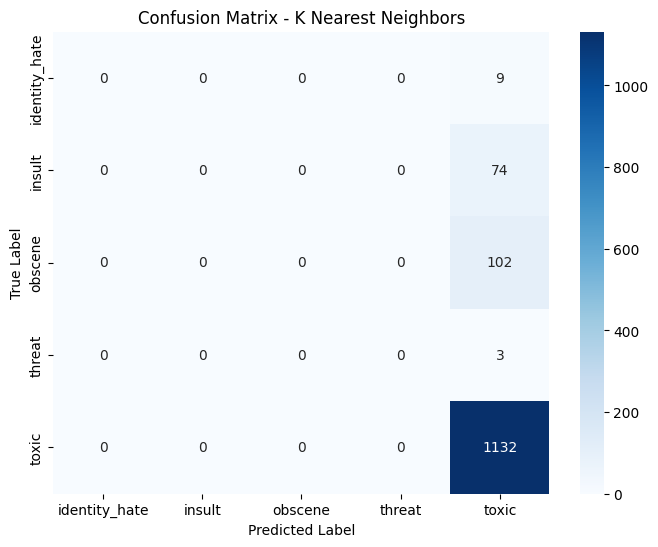

Training and evaluating SVM...
SVM - Accuracy: 0.8576, F1 Score: 0.7918, Precision: 0.7354, Recall: 0.8576
SVM - Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         9
           1       0.00      0.00      0.00        74
           2       0.00      0.00      0.00       102
           3       0.00      0.00      0.00         3
           4       0.86      1.00      0.92      1132

    accuracy                           0.86      1320
   macro avg       0.17      0.20      0.18      1320
weighted avg       0.74      0.86      0.79      1320




C:\Users\Teacher\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Teacher\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Teacher\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifi

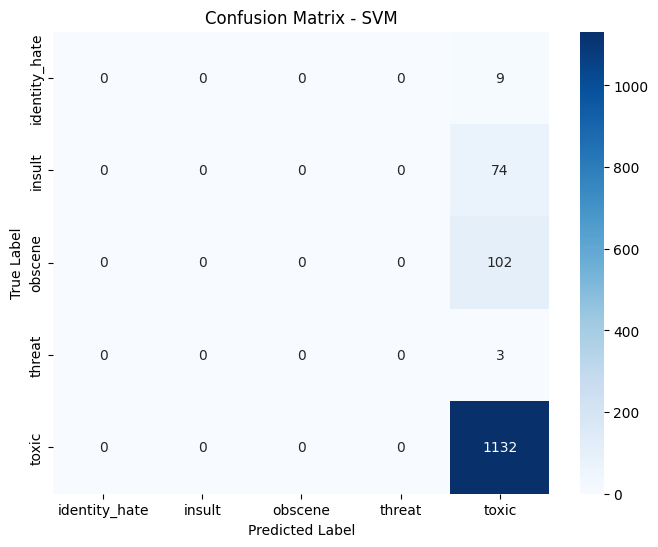

Training and evaluating Decision Tree...
Decision Tree - Accuracy: 0.7985, F1 Score: 0.7829, Precision: 0.7696, Recall: 0.7985
Decision Tree - Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         9
           1       0.14      0.09      0.11        74
           2       0.22      0.17      0.19       102
           3       0.12      0.33      0.18         3
           4       0.87      0.91      0.89      1132

    accuracy                           0.80      1320
   macro avg       0.27      0.30      0.27      1320
weighted avg       0.77      0.80      0.78      1320




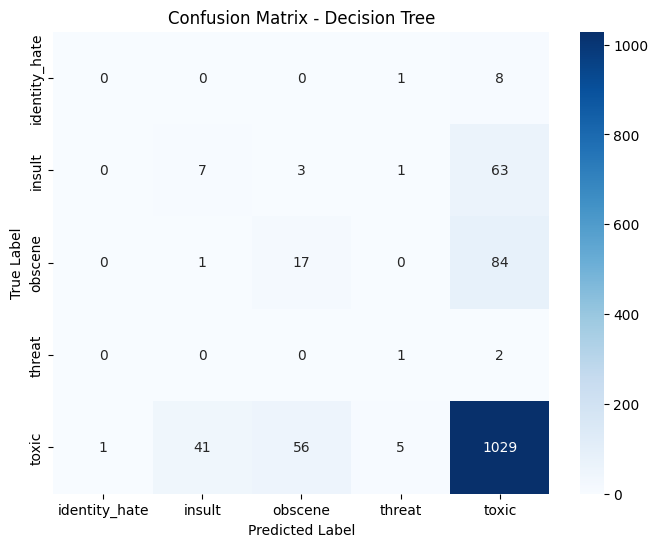

Training and evaluating Random Forest...
Random Forest - Accuracy: 0.8538, F1 Score: 0.7899, Precision: 0.7350, Recall: 0.8538
Random Forest - Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         9
           1       0.00      0.00      0.00        74
           2       0.00      0.00      0.00       102
           3       0.00      0.00      0.00         3
           4       0.86      1.00      0.92      1132

    accuracy                           0.85      1320
   macro avg       0.17      0.20      0.18      1320
weighted avg       0.73      0.85      0.79      1320




C:\Users\Teacher\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Teacher\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Teacher\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifi

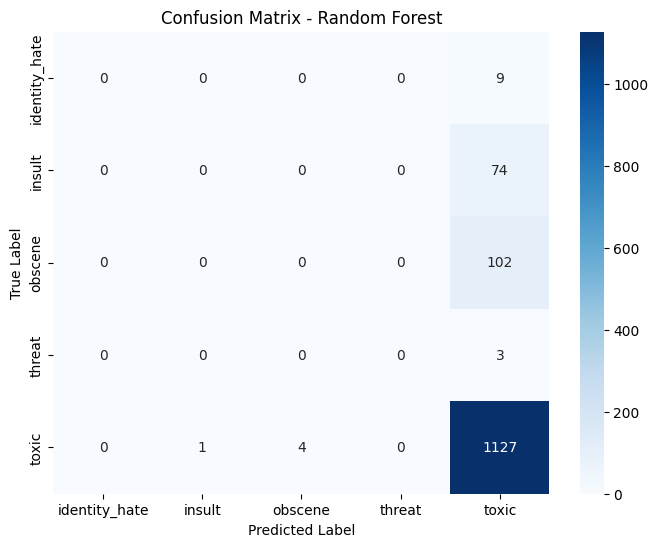

Training and evaluating Neural Net (Multi-layer perceptron)...
Neural Net (Multi-layer perceptron) - Accuracy: 0.8576, F1 Score: 0.7918, Precision: 0.7354, Recall: 0.8576
Neural Net (Multi-layer perceptron) - Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         9
           1       0.00      0.00      0.00        74
           2       0.00      0.00      0.00       102
           3       0.00      0.00      0.00         3
           4       0.86      1.00      0.92      1132

    accuracy                           0.86      1320
   macro avg       0.17      0.20      0.18      1320
weighted avg       0.74      0.86      0.79      1320




C:\Users\Teacher\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Teacher\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Teacher\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Teacher\AppData\Local\Programs\Python\Python31

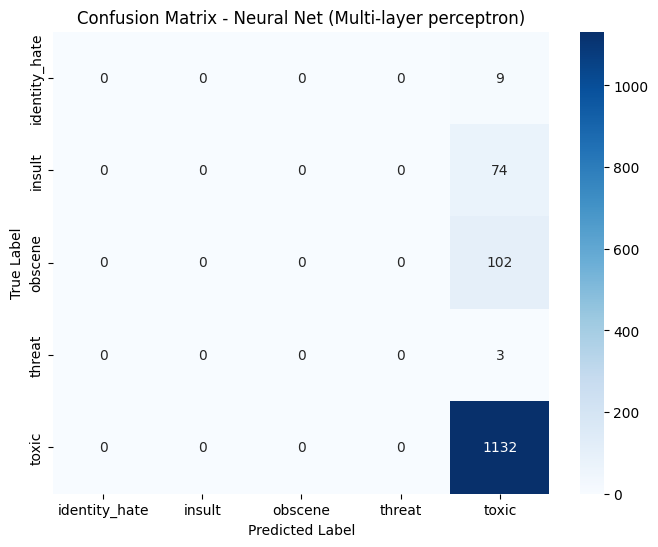

Training and evaluating AdaBoost...
AdaBoost - Accuracy: 0.8508, F1 Score: 0.7891, Precision: 0.7357, Recall: 0.8508
AdaBoost - Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         9
           1       0.00      0.00      0.00        74
           2       0.00      0.00      0.00       102
           3       0.00      0.00      0.00         3
           4       0.86      0.99      0.92      1132

    accuracy                           0.85      1320
   macro avg       0.17      0.20      0.18      1320
weighted avg       0.74      0.85      0.79      1320




C:\Users\Teacher\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Teacher\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Teacher\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifi

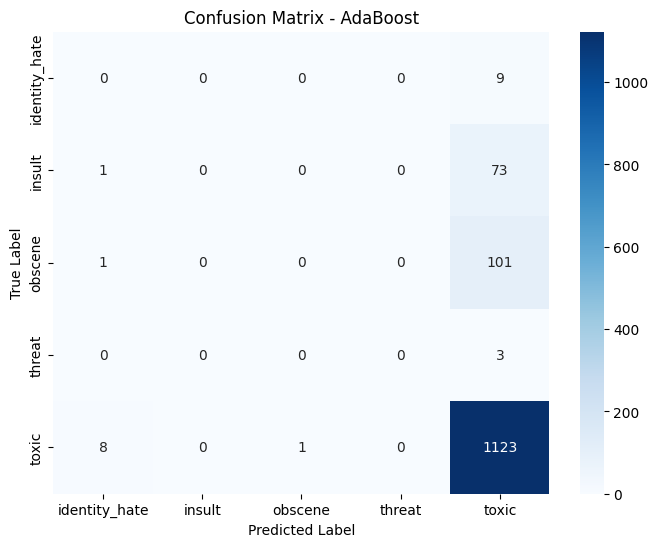

In [34]:
## Train and evaluate each classifier
for name, pipeline in pipelines.items():
    print(f"Training and evaluating {name}...")
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')  # Use weighted average for multiclass F1-score
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    
    # Print classification report for detailed metrics
    print(f"{name} - Accuracy: {accuracy:.4f}, F1 Score: {f1:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}")
    print(f"{name} - Classification Report:")
    print(classification_report(y_test, y_pred))
    print()
    
        # Plot confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=LE.classes_, yticklabels=LE.classes_)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title(f'Confusion Matrix - {name}')
    plt.show()

In [40]:
# Define classifiers with specified parameters
classifiers = {
#     'K Nearest Neighbors': KNeighborsClassifier(n_neighbors=5),
#     'SVM': SVC(degree=2, gamma=0.7, kernel='rbf'),
#     'Decision Tree': DecisionTreeClassifier(criterion='gini', splitter='best', min_samples_split=2),
#     'Random Forest': RandomForestClassifier(n_estimators=100, criterion='gini', min_samples_split=2, min_samples_leaf=1, max_features='sqrt'),
#     'Neural Net (Multi-layer perceptron)': MLPClassifier(solver='adam', alpha=1, hidden_layer_sizes=(15,)),
#     'AdaBoost': AdaBoostClassifier(n_estimators=50, learning_rate=1.0, algorithm='SAMME.R'),
    'Gaussian Process': GaussianProcessClassifier(),
    'Naive Bayes (GaussianNB)': GaussianNB(var_smoothing=1e-9)
}

In [41]:
# Create pipeline for each classifier
pipelines = {}
for name, clf in classifiers.items():
    pipelines[name] = Pipeline([
        ('tfidf', tfidf_vectorizer),
        ('to_dense', DenseTransformer()), 
        ('classifier', clf)
    ])

C:\Users\Teacher\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy: 0.9384
F1 Score: 0.9085
Precision: 0.8805
Recall: 0.9384


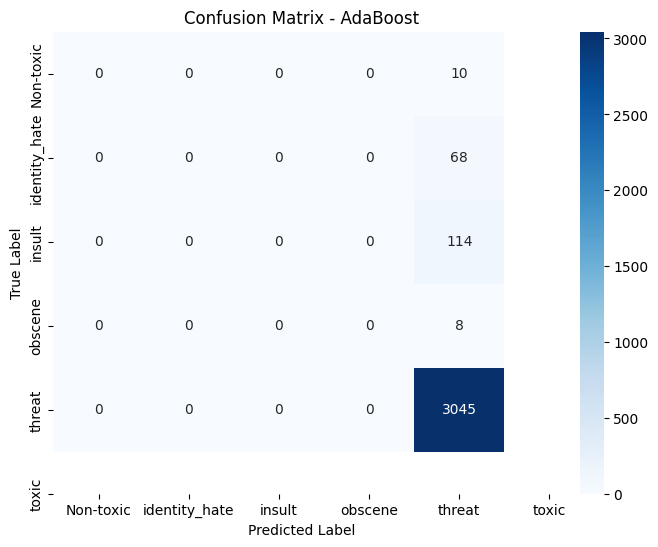

In [33]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB

count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)

tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

clf = MultinomialNB().fit(X_train_tfidf, y_train)

# Transform test data using CountVectorizer and TfidfTransformer
X_test_counts = count_vect.transform(X_test)
X_test_tfidf = tfidf_transformer.transform(X_test_counts)

# Predict labels using the trained classifier
y_pred = clf.predict(X_test_tfidf)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')  # Use weighted average for multiclass F1-score
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")

    # Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=LE.classes_, yticklabels=LE.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title(f'Confusion Matrix - {name}')
plt.show()

In [64]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import FunctionTransformer


# # Sample DataFrame with text data and corresponding labels
# data = {
#     'text': ['This is a good day', 'I am happy', 'This is a bad day', 'I am sad'],
#     'label': [1, 2, 0, 2]  # Multiclass labels
# }
# df = pd.DataFrame(data)

# # Split data into features (X) and labels (y)
# X = df['text']
# y = df['label']

# # Split data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Define TF-IDF vectorizer
# tfidf_vectorizer = TfidfVectorizer()

transformer = FunctionTransformer(lambda x: x.toarray(), accept_sparse=True)

# Define classifiers
classifiers = {
    'Gaussian Naive Bayes': GaussianNB()
}

# Create pipelines for each classifier with TF-IDF vectorization
pipelines = {}
for name, clf in classifiers.items():
    pipelines[name] = Pipeline([
        ('tfidf', tfidf_vectorizer),
        ('dense', transformer),
        ('classifier', clf)
    ])

# Train and evaluate each classifier
for name, pipeline in pipelines.items():
    print(f"Training and evaluating {name}...")
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    
    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    
    # Print evaluation metrics
    print(f"{name} - Accuracy: {accuracy:.4f}, F1 Score: {f1:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}")
    
    # Plot confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    print(f"{name} - Confusion Matrix:")
    print(cm)
    print()

Training and evaluating Gaussian Naive Bayes...
Gaussian Naive Bayes - Accuracy: 0.8875, F1 Score: 0.8820, Precision: 0.8865, Recall: 0.8875
Gaussian Naive Bayes - Confusion Matrix:
[[142   0   7   1   1]
 [  0 136   6   2   0]
 [  2   2 134   3   3]
 [  1   2  20 168   2]
 [  0   1  15   6   4]]



In [36]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

# Define TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Models to evaluate
models = [
    MultinomialNB(),
    LogisticRegression(random_state=0),
    SVC(degree=2, gamma=0.7, kernel='rbf'),
    RandomForestClassifier(n_estimators=100, criterion='gini', min_samples_split=2, min_samples_leaf=1, max_features='sqrt'),
    MLPClassifier(solver='adam', alpha=1, hidden_layer_sizes=(15,)),
]

CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))

entries = []
for model in models:
    model_name = model.__class__.__name__
    pipeline = Pipeline([
        ('tfidf', tfidf_vectorizer),
#         ('smote', SMOTE(random_state=12)),
        ('classifier', model)
    ])
    accuracies = cross_val_score(pipeline, X, y, scoring='accuracy', cv=CV)
    for fold_idx, accuracy in enumerate(accuracies):
        entries.append((model_name, fold_idx, accuracy))

cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])




C:\Users\Teacher\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Teacher\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Teacher\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


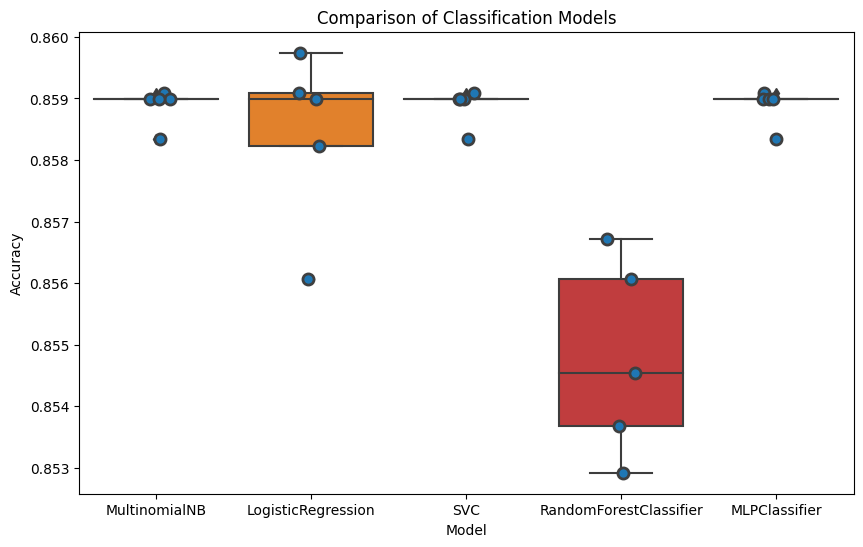

model_name
LogisticRegression        0.858421
MLPClassifier             0.858875
MultinomialNB             0.858875
RandomForestClassifier    0.854782
SVC                       0.858875
Name: accuracy, dtype: float64


In [37]:
# Plotting the results
plt.figure(figsize=(10, 6))
sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)
plt.title('Comparison of Classification Models')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.show()

# Print average accuracy scores
print(cv_df.groupby('model_name').accuracy.mean())